<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 10

# Question 1

We create the input data by summing three different functions and one noise:<br/>
$f_1(x,t) = \text{sech}(x-2)\exp(i2.3t)$<br/>
$f_2(x,t) = 2\text{sech}(x)\tanh(x+2)\exp(i1.5t)$.<br/>
$f_3(x,t) = 1.5\text{sech}(x+2)\tanh(x+3)\exp(i3.5t)$.<br/>
<br/>
$f=f_1(x,t)+f_2(x,t)+f_3(x,t)+\text{noise}$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pydmd import DMD


In [2]:
def f1(x,t): 
    return 1./np.cosh(x-2)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x+2)*np.exp(1.5j*t)

def f3(x,t):
    return 1.5/np.cosh(x+2)*np.tanh(x+3)*np.exp(3.5j*t)


x = np.linspace(-5, 5, 128)
t = np.linspace(0, 4*np.pi, 256)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X3 = f3(xgrid, tgrid)
noise = np.random.normal(0.0, 0.4, size=xgrid.shape)
X = X1 + X2 + X3 + noise

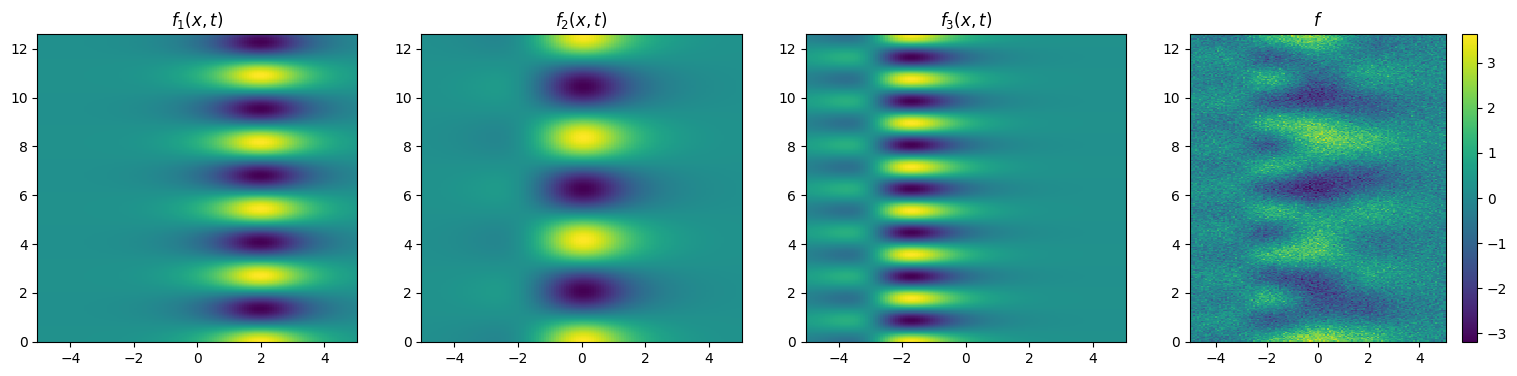

In [3]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$','$f_3(x,t)$', '$f$']
data = [X1, X2, X3, X]

fig = plt.figure(figsize=(19,4))
for n, title, d in zip(range(141,145), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

Apply the DMD to the collected data such that the relative error is smaller than 0.1. 

You may need to adjust the arguments of `DMD`, e.g. `svd_rank`, `tlsq_rank`.

In [10]:
# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(1, 50, 1)
list_of_tlsq_rank = np.arange(0, 50, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(X.T)
        error = np.linalg.norm((X-dmd.reconstructed_data.T))/np.linalg.norm(X)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)


[0.9582166037191229, 0.9568722142700768, 0.9570933197410856, 0.9575581582280056, 0.9575700067635308, 0.9575752330804268, 0.9576378218085042, 0.9577452819163697, 0.9577482278888909, 0.9577700447606438, 0.9578109828080381, 0.9578381051627997, 0.957850706494157, 0.9578523540570137, 0.9579023315678904, 0.9579142707497936, 0.9579256953354683, 0.9579264244682885, 0.9579750484624019, 0.9579821299171157, 0.958063959003923, 0.9580653199781624, 0.9580665677081285, 0.9580679951123571, 0.9580697887810605, 0.9581110245959444, 0.9581177589475713, 0.958126271688502, 0.9581275250636591, 0.9581352671433563, 0.9581385108684409, 0.9581449991490792, 0.9581610051839854, 0.9581667336464199, 0.9581888486213304, 0.9581925072424563, 0.9582298750579696, 0.9582318676407022, 0.9582361481718139, 0.958236994552381, 0.9582412686446707, 0.9582499812571659, 0.9582501126581584, 0.9582535776841641, 0.9582572638135477, 0.9582679537893641, 0.9582739078819713, 0.9582739610003416, 0.958289447813372, 0.9582902381314056, 0.75

## Parallel test:

Fix 1~20 and 0~20 for SVD rank and `tlsq_rank`. Run for 3 settings: 

- a) DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
- b) DMD(svd_rank=int(i), tlsq_rank=int(j))
- c)  DMD(svd_rank=int(i))

In [14]:
# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(1, 20, 1)
list_of_tlsq_rank = np.arange(0, 20, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(X.T)
        error = np.linalg.norm((X-dmd.reconstructed_data.T))/np.linalg.norm(X)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)


[0.9582166037191229, 0.9568722142700768, 0.9570933197410856, 0.9575581582280056, 0.9575700067635308, 0.9575752330804268, 0.9576378218085042, 0.9577452819163697, 0.9577482278888909, 0.9577700447606438, 0.9578109828080381, 0.9578381051627997, 0.957850706494157, 0.9578523540570137, 0.9579023315678904, 0.9579142707497936, 0.9579256953354683, 0.9579264244682885, 0.9579750484624019, 0.9579821299171157, 0.7588969093282028, 0.9589258571219834, 0.7498481391865188, 0.7501058392446388, 0.7500932223623548, 0.7498977174709184, 0.7500454938411055, 0.7506635833977285, 0.7506975488436786, 0.7508275788037336, 0.75095310844473, 0.7510998301003853, 0.7508982240903325, 0.7508597469383937, 0.7510840986486965, 0.7512468093029204, 0.7514466208643696, 0.7514513217811587, 0.7519835980741454, 0.7520068476101964, 0.503839821080619, 0.9584318438287841, 0.756615742766886, 0.36224629126615004, 0.36222683511287834, 0.36241322272810345, 0.3624916767215337, 0.36226661010884176, 0.3621227001444964, 0.3630314648717639, 

## Another run: try to remove `exact=True, opt=True` on DMD()

In [12]:
# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(1, 20, 1)
list_of_tlsq_rank = np.arange(0, 20, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j))
        dmd.fit(X.T)
        error = np.linalg.norm((X-dmd.reconstructed_data.T))/np.linalg.norm(X)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)


[1.1843867663468894, 1.32862320347775, 1.3105162477037176, 1.2948083899222431, 1.2941430028959413, 1.2939075521295047, 1.2901126437734716, 1.283022540064479, 1.2828284103693952, 1.2811968753963037, 1.2783065415820956, 1.2763606366563012, 1.275636046602866, 1.275491901140697, 1.2718029364634102, 1.2704558296013726, 1.2691853838794458, 1.2690865252198178, 1.264675569944731, 1.2641125832098536, 0.8750882048015935, 1.3448485945743607, 1.0208018520112698, 1.0094187179745837, 1.008339195914827, 1.0014602846692007, 0.9985697321479081, 0.9953572228220784, 0.9950732122170689, 0.9937753484102941, 0.9909538273410528, 0.986520047662124, 0.9808939529836516, 0.9775198737809719, 0.9751568446122418, 0.9628361076362687, 0.9558890755774037, 0.9546027622343347, 0.9514925263732678, 0.9511445716018045, 0.5758420195333612, 1.3415291388089714, 1.033770065240282, 0.3816247439741243, 0.3817760865254374, 0.38250048238850115, 0.38322058400608955, 0.3852609681490163, 0.3873881242773984, 0.3887519073646549, 0.3893

## Running time = 52.8s, and the error does not raise significantly. 

## Another run: try to only use `svd_rank` parameter

In [13]:
# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(1, 20, 1)
list_of_tlsq_rank = np.arange(0, 20, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i))
        dmd.fit(X.T)
        error = np.linalg.norm((X-dmd.reconstructed_data.T))/np.linalg.norm(X)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)


[1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 1.1843867663468894, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.8750882048015935, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612, 0.5758420195333612,

## Running time reduce to 32.8s but the error raises significantly. 

relative error:
0.40358030436292935


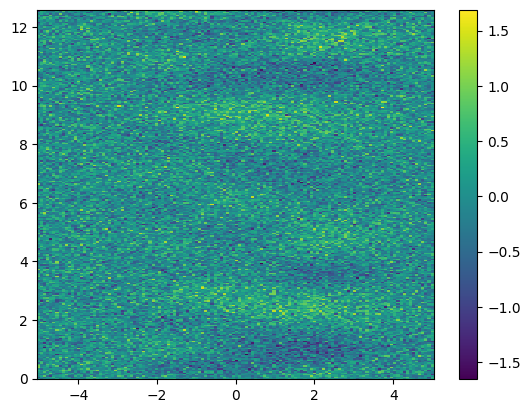

In [20]:
# Then we can see the error surface when the optimal svd_rank and tlsq_rank are used.

dmd = DMD(svd_rank=optimal_svd_rank, tlsq_rank=optimal_tlsq_rank, exact=True, opt=True)
dmd.fit(X.T)

plt.pcolor(xgrid, tgrid, (X-dmd.reconstructed_data.T).real)
fig = plt.colorbar()

print("relative error:")
print(np.linalg.norm((X-dmd.reconstructed_data.T))/np.linalg.norm(X))

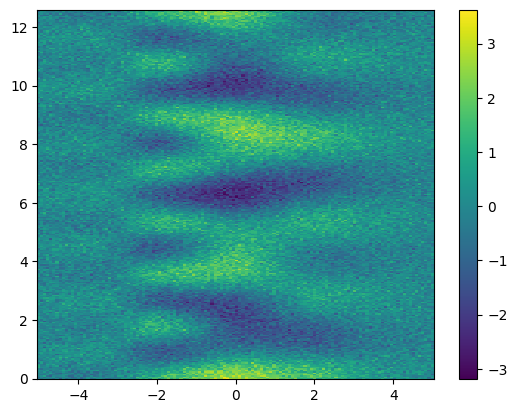

In [21]:
plt.pcolor(xgrid, tgrid, X.real)
fig = plt.colorbar()

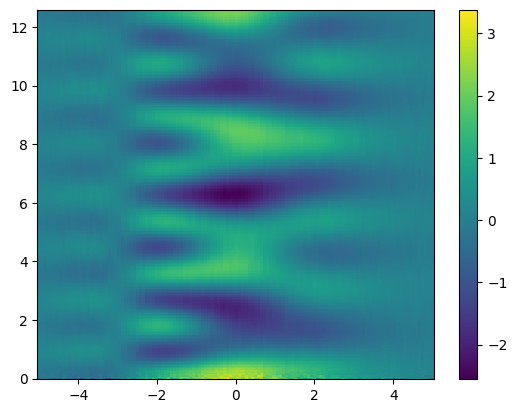

In [22]:

plt.pcolor(xgrid, tgrid, dmd.reconstructed_data.T.real)
fig = plt.colorbar()

## Update Relative error function: Compare reconstructed data with `X1 + X2 + X3`, instead of comparing with `X`. 

In [23]:
# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(1, 20, 1)
list_of_tlsq_rank = np.arange(0, 20, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(X.T)
        error = np.linalg.norm((X1 + X2 + X3 -dmd.reconstructed_data.T))/np.linalg.norm(X)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)


[1.1278084970524205, 1.2780280236515376, 1.2592453640891683, 1.2429373250627818, 1.2422460849342603, 1.2420013938236303, 1.2380584165942645, 1.2306897466778841, 1.2304879891543536, 1.2287922342465936, 1.2257866721634023, 1.2237631192161889, 1.2230098767753763, 1.2228600286517974, 1.219022896183322, 1.2176214587798262, 1.216299775582433, 1.216196934159791, 1.2116071023635016, 1.2110211251604632, 0.797486491230548, 1.2948446784935426, 0.9545845303218251, 0.9424225282622375, 0.9412702114917639, 0.9339254873929608, 0.9308317467621219, 0.9273816462714213, 0.9270772964831954, 0.9256858077637868, 0.9226632826194938, 0.9179125214313191, 0.9118903250778037, 0.9082737871186141, 0.9057356220811983, 0.8925000060561823, 0.8850234124951886, 0.8836391539913014, 0.8802793132796041, 0.8799037929606948, 0.45090091839865665, 1.2914056191764585, 0.9683348971490491, 0.13829743204707656, 0.1386948191201539, 0.1405434112210626, 0.14242799410583876, 0.14774267412130093, 0.15313257373149924, 0.1563942924123971

## Another run: putting `exact=True, opt=True` back to the DMD algorithm

In [24]:
# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(1, 20, 1)
list_of_tlsq_rank = np.arange(0, 20, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(X.T)
        error = np.linalg.norm((X1 + X2 + X3 -dmd.reconstructed_data.T))/np.linalg.norm(X)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)


[0.8884894072351475, 0.8872092186763676, 0.8874283647033168, 0.8879083438377686, 0.8879203538022106, 0.8879257180429737, 0.8879881880875433, 0.8880953309922542, 0.8880983005463431, 0.8881199160626849, 0.8881605684325065, 0.8881874010072123, 0.8882000954142788, 0.8882016910453493, 0.8882510484424493, 0.8882624231744362, 0.8882731628680846, 0.8882738368660363, 0.8883208556725227, 0.8883277086683765, 0.6687952878559146, 0.889429307287675, 0.6589219080230173, 0.6591835060633334, 0.6591677188695634, 0.6589381138659643, 0.6590977705666301, 0.6597796683191223, 0.6598172269124257, 0.659959286171014, 0.6600944074312188, 0.6602487016361699, 0.6600143500969251, 0.6599654327427754, 0.6602116509338275, 0.6603650428416951, 0.6605705933382015, 0.6605731572099236, 0.6611581429175591, 0.6611832445413379, 0.3549885846752348, 0.8889154299656448, 0.6665374382086605, 0.07065740052337686, 0.07056627221667261, 0.07152729229810316, 0.07191775749870045, 0.07072503176757744, 0.06991408610023328, 0.0741947207762

relative error:
0.05453487881609798


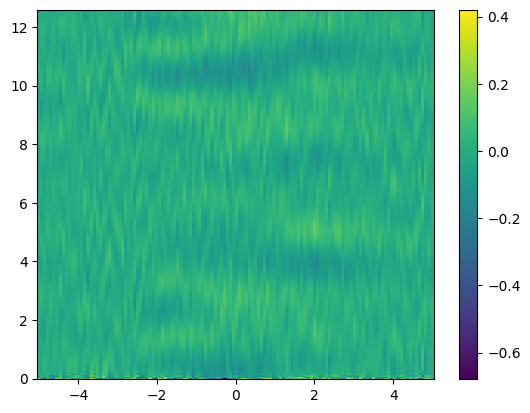

In [28]:
# Then we can see the error surface when the optimal svd_rank and tlsq_rank are used.

dmd = DMD(svd_rank=19, tlsq_rank=13, exact=True, opt=True)
dmd.fit(X.T)

plt.pcolor(xgrid, tgrid, (X1 + X2 + X3 -dmd.reconstructed_data.T).real)
fig = plt.colorbar()

print("relative error:")
print(np.linalg.norm((X1 + X2 + X3 -dmd.reconstructed_data.T))/np.linalg.norm(X))

## So we finally got an error that lower than 0.1.

### Relative error have to compare with the ground truth signal "X1 + X2 + X3" to get a small error rate, otherwise the error cannot be further reduced to lower than 0.35.


### It indicates the DMD algorithm might not be useful if we don't know `X1 + X2 + X3`

## Question 2



(506, 15)

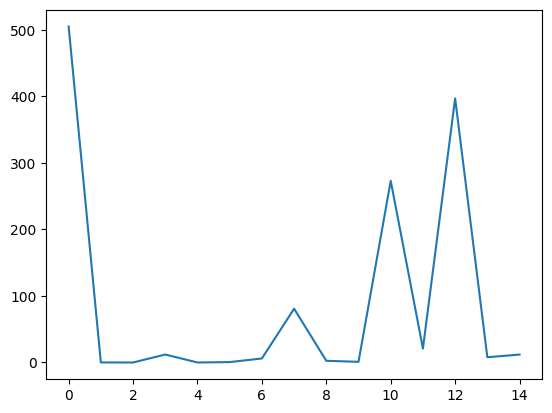

In [46]:
from numpy import sqrt
from pandas import read_csv
from pydmd import DMD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.integrate

df = read_csv('housing_price.csv')
data=np.array(df)
plt.plot(data[-1,:]) # one snapshot
data.shape

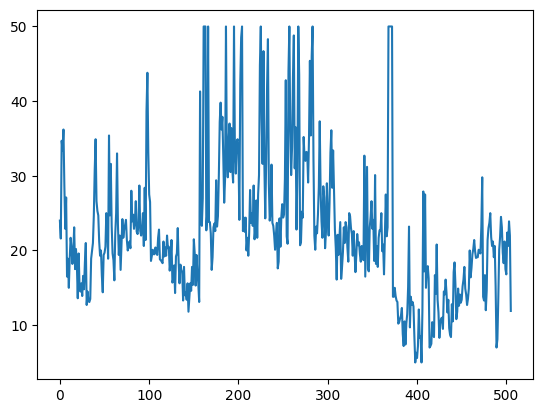

In [55]:
houseprice=np.array(df.T)
plt.plot(houseprice[-1,:]) # one snapshot

We look at the `housing` dataset. It contains variables related to the housing price. The last row of `data` is the time series of the housing price.


The data is structured like this:
$${\bf D}=\left[\begin{array}{cccc}{\bf x_0} & {\bf x_1} &\cdots & {\bf x_{505}}\\
p_0 & p_1 &\cdots& p_{505}\end{array}\right]$$

where $\bf x_t$ is a column vector of some related variables (e.g. size of the flat, rating etc) and $p_t$ is the housing price at time $t$.

Apply DMD to `data` and find `svd_rank` so that the relative error of reconstructed data is less than 0.4.

In [56]:
## answer 2a


# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(0, 30, 1)
list_of_tlsq_rank = np.arange(0, 30, 1)

list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(data.T)
        error = np.linalg.norm((data-dmd.reconstructed_data.T))/np.linalg.norm(data)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)

# The result of optimal_svd_rank = 14 matches the number of columns in the csv file. 



c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\pydmd\dmdbase.py:675: RuntimeWarning: invalid value encountered in multiply
  P = np.multiply(


[0.3145725250932366, 0.7799265338565772, 0.5739222435766984, 0.37249015233870436, 0.3310403356719952, 0.2816219947613448, 0.3503525021042393, 0.3417165951218347, 0.26036002582507634, 0.24948585529775513, 0.2947552941132994, 0.26473573108171905, 0.26116995524312003, 0.27443108901504665, 0.2877785235737811, 0.3142712881610743, 0.31427976598950663, 0.31428452903506404, 0.3145722451512974, 0.3145722745346356, 0.31457281335811854, 0.3145730163553057, 0.31457289638174757, 0.3145727164192281, 0.31457271225457323, 0.31457271210361937, 0.3145727120787799, 0.31457271208069026, 0.3145726447802065, 0.3145725382344221, 0.5658004046776831, 0.3439135571494369, 0.34391642239513454, 0.3439347606485114, 0.4690791455029063, 0.46908064900367097, 0.565573637741488, 0.5656077819049818, 0.5656858406886378, 0.565687740042141, 0.5657904039894242, 0.5657904159779049, 0.5657904498018425, 0.5657904499667041, 0.5657906314326506, 0.5657972774532048, 0.5657973144707021, 0.5657973279345054, 0.5658001986799807, 0.5658

What is the relative error for the housing price time series (the last row of `data`) for that `svd_rank`?

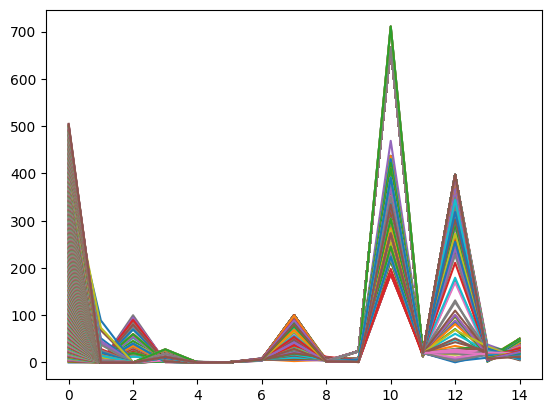

In [57]:
## answer 2b
dmd = DMD(svd_rank=13, tlsq_rank=14, exact=True, opt=True)
dmd.fit(data.T)


plt.plot(data.T)

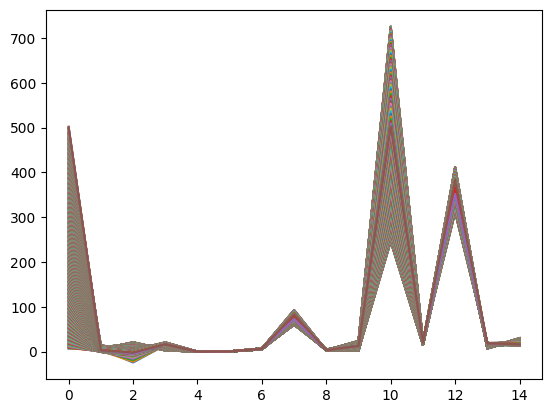

In [59]:
plt.plot(dmd.reconstructed_data)

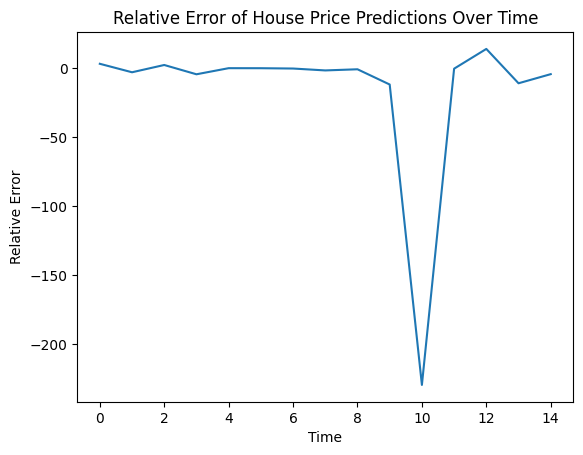

In [60]:

error= data - dmd.reconstructed_data.T

plt.plot(error[-1,:])
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.title('Relative Error of House Price Predictions Over Time')
plt.show()

If we only look at the first 20 days, say
$$D_{20} = \begin{bmatrix}\mathbf{x}_0 & \cdots &\mathbf{x}_{19}\\
p_0 & \cdots & p_{19}
\end{bmatrix}$$

Apply DMD with a suitable `svd_rank` (within 1 and 14).

Make the DMD delta time a quarter of the original and extend the temporal window to  $[0,2t_{org}]$, where $t_{org}$ indicates the time when the last snapshot was caught.

Plot the resultant figure along with the original data.

- Delta time: refers to the time interval between consecutive snapshots.
- Delta time a quarter of the original: original days is 507, so a quarter of the original would be 507/4? = 127
- Extend the temporal window to $[0, 2t_{org}]$

So the question wants us to use the first 20 days of data to create a model and then extend that model's prediction to 1014 days. 

In [64]:
## answer 2c
print(data.shape)
data_truncate = data[:20,:]
print(data_truncate.shape)

# Use arange to create a list of integer values between 0 and 20.
list_of_svd = np.arange(0, 16, 1)
list_of_tlsq_rank = np.arange(0, 5, 1)


list_of_relative_error = []

min_error = float('inf')
optimal_svd_rank = None
optimal_tlsq_rank = None

for i in list_of_svd:
    for j in list_of_tlsq_rank:
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(data_truncate.T)
        error = np.linalg.norm((data_truncate.T-dmd.reconstructed_data.real))/np.linalg.norm(data.T)
        list_of_relative_error.append(error)
        if error < min_error:
            min_error = error
            optimal_svd_rank = i
            optimal_tlsq_rank = j

print(list_of_relative_error)
print("The minimum relative error is:", min_error)
print("The optimal svd_rank is:", optimal_svd_rank)
print("The optimal tlsq_rank is:", optimal_tlsq_rank)

# The result of optimal_svd_rank = 14 matches the number of columns in the csv file. 



(506, 15)
(20, 15)
[0.3145725250932366, 0.7799265338565772, 0.5739222435766984, 0.37249015233870436, 0.33104033567199515, 0.5658004046776831, 0.3439135571494369, 0.34391642239513454, 0.3439347606485114, 0.4690791455029063, 0.4828550140458457, 0.4712530966697052, 0.29914213206798185, 0.298916326650952, 0.33827575122796616, 0.32132018555400876, 0.6968551889027865, 0.6206344442387319, 0.2878586906568472, 0.3324551295470806, 0.32132765631354326, 0.6972257216423746, 0.6794507333293268, 0.30108758196884244, 0.3167719360993173, 0.3171646012031382, 0.7616554505579155, 0.5931839797972174, 0.368454553922432, 0.34022838052404303, 0.3145725250932366, 0.7799265338565772, 0.5739222435766984, 0.39293101512177386, 0.3552856882177672, 0.3142865180838555, 0.7813366285877017, 0.5965037127926323, 0.37249015233870436, 0.33104033567199515, 0.3033913648369728, 0.7913706210218525, 0.5879893378577992, 0.35295907835745977, 0.40883044953143816, 0.30454857144121955, 0.7654631969850825, 0.5713434006087384, 0.34714

In [67]:
dmd = DMD(svd_rank=14, tlsq_rank=13, exact=True, opt=True)
dmd.fit(data_truncate.T)

print(data_truncate.T.shape)



(15, 20)


c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\pydmd\snapshots.py:72: UserWarning: Input data condition number 5.493611487504585e+18. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


Shape before manipulation: (15, 153)
Shape after manipulation: (15, 1217)


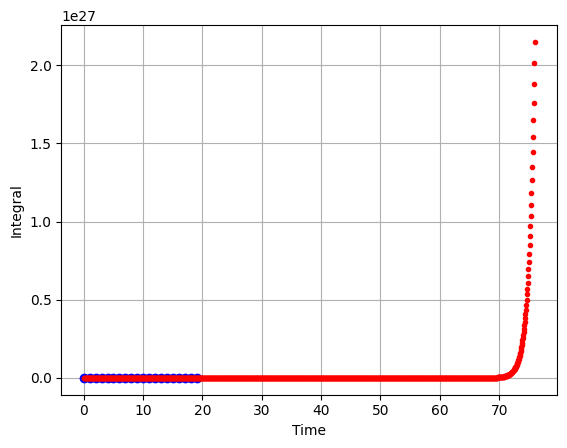

In [69]:
print("Shape before manipulation: {}".format(dmd.reconstructed_data.shape))
dmd.dmd_time['dt'] *= .25
dmd.dmd_time['tend'] *= 2
print("Shape after manipulation: {}".format(dmd.reconstructed_data.shape))

housing_price=data[:,-1]

plt.plot(dmd.original_timesteps,housing_price[:20], 'bo', label='reconstructed snapshots')
plt.plot(dmd.dmd_timesteps, dmd.reconstructed_data.real[-1], 'r.', label='dmd states')
#plt.plot(dmd.reconstructed_data, 'r.', label='dmd states')
plt.ylabel('Integral')
plt.xlabel('Time')
plt.grid()


Now, we want to only model the time series of `housing_price`, instead of the whole data matrix. 

Denote the time series by $(p_0,p_1,\cdots,p_T)$. We can form the Hankel matrix by

$$\begin{align*}
H = \left[\begin{array}{cccccc}
p_0 & p_1 & p_2 & \cdots & p_{T-k} & p_{T-k+1} \\
p_1 & p_2 & p_3 & \cdots & p_{T-k+1} & p_{T-k+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
p_{k-1} & p_k & p_{k+1} & \cdots & p_{T-1} & p_{T}
\end{array}\right]
\end{align*}$$

Simply put, each column of $H$ records a window of $k$ consecutive values of the series. 

Now complete the function `hankel` to construct the Hankel matrix, given a one-dimensional array `ts` denoting the time series and the window size `k`.



In [37]:
print(data.shape)

(15, 506)


In [38]:
housing_price=data[-1,:]
def hankel(ts,k):
    ## answer of 2d
    HSm = []
    for i in range(len(ts)-k+1):
        HSm.append(ts[i:i+k])
    return np.vstack(HSm)


In [39]:
print(hankel(housing_price, 4))

[[24.  21.6 34.7 33.4]
 [21.6 34.7 33.4 36.2]
 [34.7 33.4 36.2 28.7]
 ...
 [16.8 22.4 20.6 23.9]
 [22.4 20.6 23.9 22. ]
 [20.6 23.9 22.  11.9]]


By applying DMD to $H$, we are approximating the matrix $\bf A$,
$$\begin{align*}
\left[\begin{array}{cccc}
p_1 & p_2 & \cdots & p_{T-k+1} \\
p_2 & p_3 & \cdots & p_{T-k+2} \\
\vdots & \vdots & \vdots & \vdots \\
p_{k} & p_{k+1} & \cdots & p_{T} \end{array}\right]
\approx {\bf A}
\left[\begin{array}{cccc}
p_0 & p_1 & \cdots & p_{T-k} \\
p_1 & p_2 & \cdots & p_{T-k+1} \\
\vdots & \vdots & \vdots & \vdots \\
p_{k-1} & p_{k} & \cdots & p_{T-1} \end{array}\right]
\end{align*}$$

Now if we fix `svd_rank=14` and `k`$=10,20,50,100$ or $200$, what is the optimal value for the window size `k` so that the relative reconstruction error is minimal?

In [40]:
## answer of 2e
set_of_k = [10,20,50,100,200]

list_of_error = {}

for elt in set_of_k:
        Hask = hankel(housing_price, elt)
        dmd = DMD(svd_rank=int(i), tlsq_rank=int(j), exact=True, opt=True)
        dmd.fit(Hask.T) # Transpose because column represent snapshots 
        error = np.linalg.norm((Hask-dmd.reconstructed_data.T))/np.linalg.norm(Hask)
        list_of_error[elt] = error
print(list_of_error)

{10: 0.5146460659856426, 20: 0.3762465527339854, 50: 0.34006703230161217, 100: 0.3672083263022798, 200: 0.3327345194867732}


## So the best option is k = 200